In [44]:
import numpy as np
import timeit
from bitarray import bitarray
import matplotlib.pyplot as plt
import struct
from bitarray.util import ba2int
import math

#### Zad 1

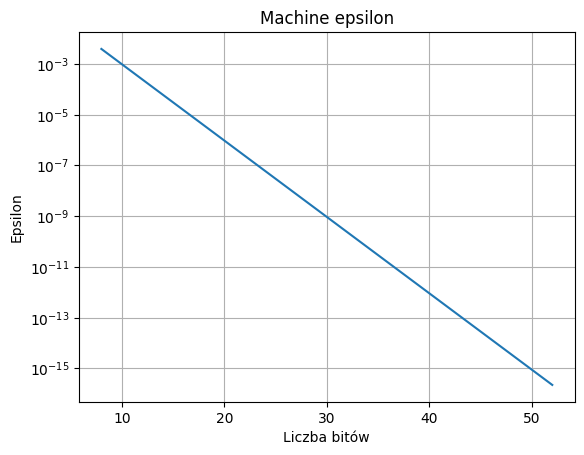

In [45]:
x = np.arange(8, 53)
y = np.power(1/2, x)

plt.plot(x, y)
plt.yscale("log")
plt.title("Machine epsilon")
plt.xlabel("Liczba bitów")
plt.ylabel("Epsilon")
plt.grid(True)

#### Zad 2

In [46]:
def bit_to_float_ieee754(bit_string : str) -> float:
    bits = bitarray(bit_string)
    sign = bits[0]
    exponenta = ba2int(bits[1:9])
    mantissa = 1 + sum(bits[i] * 2 **(-(i-8)) for i in range(9, 32))

    val = mantissa * 2 **(exponenta - 127)

    if sign:
        val = -1 * val

    return val

print(bit_to_float_ieee754("10001000010001000000000010000010"))  # -5.89822e-34
print(bit_to_float_ieee754("01101000010101011011100010110010"))  # 4.03700844e24


-5.8982201477584125e-34
4.037084352050143e+24


In [92]:
def float_to_bit_ieee754(value: float) -> str:
    sign = 0
    if value < 0:
        sign = 1
        value = abs(value)

    integer_part = int(value)
    decimal_part = value - integer_part

    int_bin = bin(integer_part)
    print(int_bin)

float_to_bit_ieee754(bit_to_float_ieee754("01000000011000000000000000000000"))

0b11


#### Zad 3

In [80]:
def e(desired_error):
    x = 1
    e_n = 0
    e_prev = 0   # e_i-1
    error = 100
    loop_iter = 0
    while error > desired_error:
        e_prev = e_n
        e_n += x**loop_iter/math.factorial(loop_iter)
        error = ((e_n - e_prev) / e_n) * 100
        loop_iter += 1

    return e_n, error, loop_iter

print(f"0.01% error: {e(0.01)}")
print(f"5% error: {e(5)}")

time_1 = timeit.timeit("e(1)", globals=globals())
time_5 = timeit.timeit("e(5)", globals=globals())

print(f"Time 1%: {time_1}\nTime 5%: {time_5}")

0.01% error: (2.7182539682539684, 0.007299270073000843, 8)
5% error: (2.708333333333333, 1.5384615384615332, 5)
Time 1%: 0.678419286999997
Time 5%: 0.544545587000357
